<a href="https://colab.research.google.com/github/Aman-rkl/Data_Analysis/blob/main/zomato_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zomato Data Analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading


In [ ]:
dataframe = pd.read_csv("/content/sample_data/Zomato-data-.csv")
print(dataframe.head(10))

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes  approx_cost(for two people) listed_in(type)  
0  4.1/5    775                          800          Buffet  
1  4.1/5    787

Data Cleaning


In [ ]:
def handle_rate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)



dataframe['rate'] = dataframe['rate'].apply(handle_rate)
print("Updated DataFrame")
print(dataframe)

Updated DataFrame
                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                       

In [ ]:
print("Description of the data")
dataframe.describe()

Description of the data


,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [ ]:
print("Data info")
print(dataframe.info())

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
None


In [ ]:
print("Checking if there is NaN")
print(dataframe.isnull().sum())

Checking if there is NaN
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


Type of Restaurant

Text(0.5, 0, 'Type of restaurant')

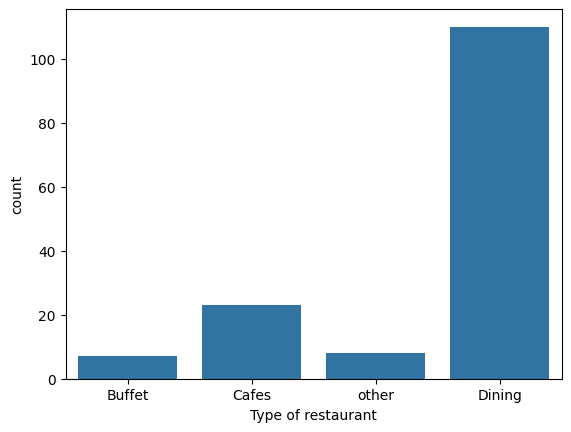

In [ ]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")


Conclusion: The majority of the restaurants fall into the dining category

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


Text(0, 0.5, 'Votes')

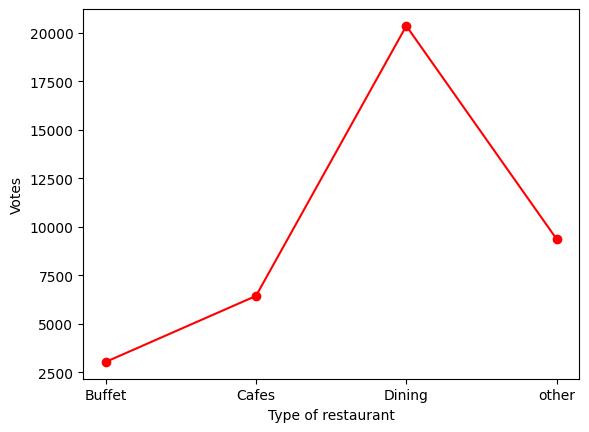

In [ ]:
grouped = dataframe.groupby('listed_in(type)')['votes'].sum()
print(grouped)
plt.plot(grouped, c='red', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

Conclusion: Dining restaurants are preferred by a lar

In [ ]:
max_votes = dataframe['votes'].max()
print(max_votes)
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes,'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

4884
Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

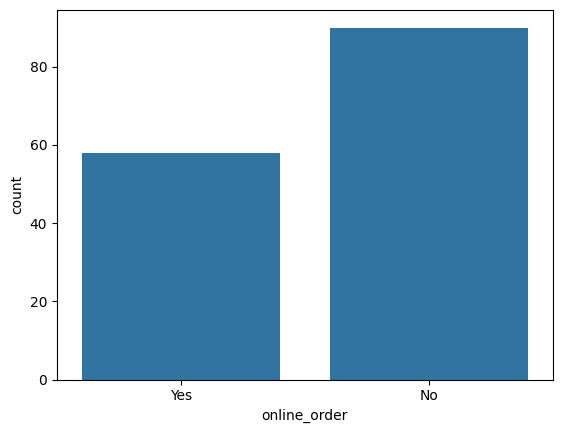

In [ ]:
sns.countplot(x=dataframe['online_order'])

Conclusion: This suggests that a majority of the restaurants do not accept online orders.



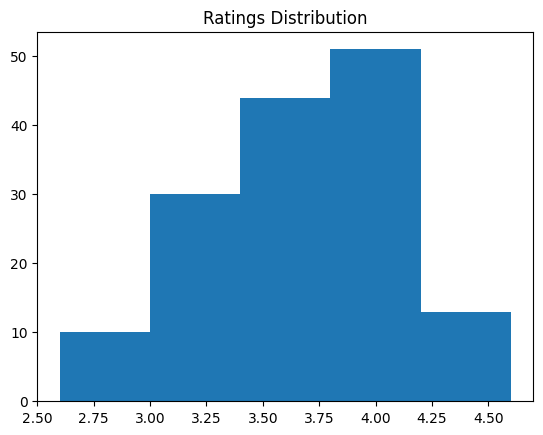

In [ ]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.




<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

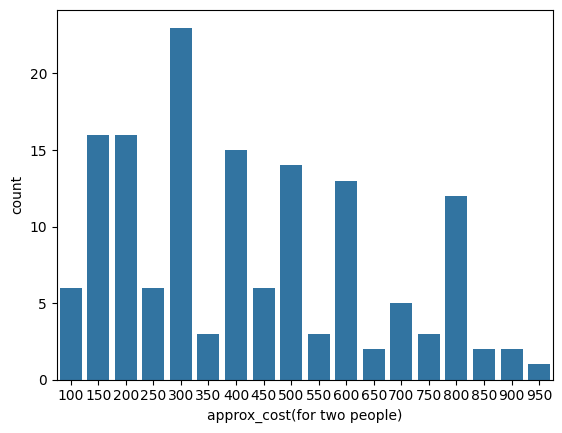

In [ ]:
sns.countplot(x=dataframe['approx_cost(for two people)'])

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.




<Axes: xlabel='online_order', ylabel='rate'>

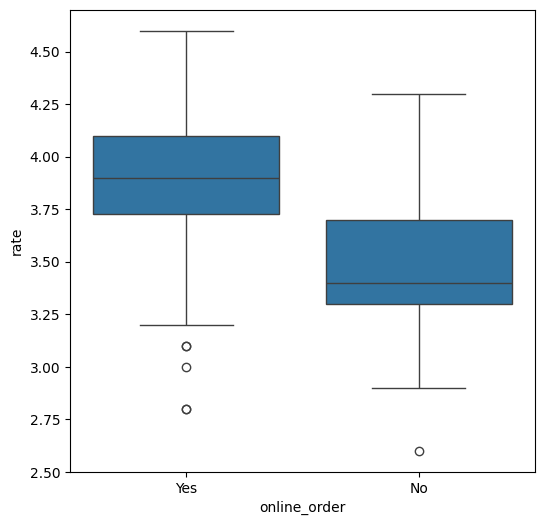

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.




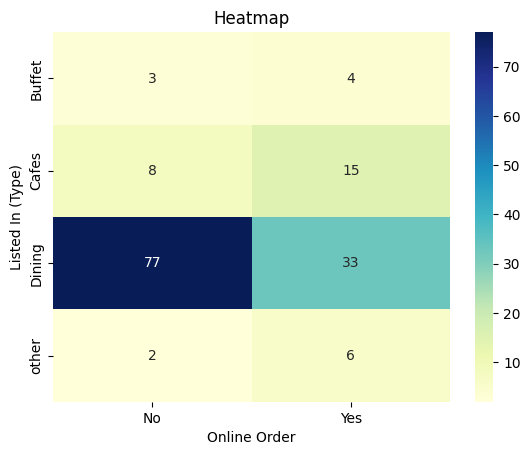

In [ ]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()